In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('train_ctrUa4K.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train_data.shape

(614, 13)

In [6]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Gender, married , education, self employed, property area and Loan status

In [7]:
train_data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)

In [9]:
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)

In [10]:
train_data['Education'].fillna(train_data['Education'].mode()[0],inplace=True)

In [11]:
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)

In [12]:
train_data['Property_Area'].fillna(train_data['Property_Area'].mode()[0],inplace=True)

In [13]:
train_data['Loan_Status'].fillna(train_data['Loan_Status'].mode()[0],inplace=True)

In [14]:
train_data['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [15]:
train_data['Married'].replace({'Yes':1,'No':0},inplace=True)

In [16]:
train_data['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [17]:
train_data['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [18]:
train_data['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [19]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
train_data['Dependents'].value_counts()
train_data['Dependents'].replace({'3+':3},inplace=True)

In [21]:
train_data['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [22]:
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)

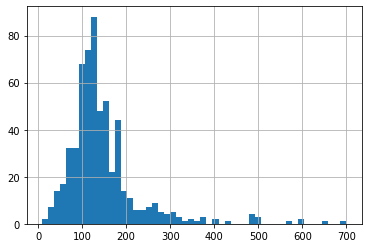

In [23]:
train_data['LoanAmount'].hist(bins=50)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)

In [24]:
train_data['Loan_Amount_Term'].value_counts()
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(),inplace=True)

In [25]:
train_data['Credit_History'].value_counts()
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)

In [26]:
columns=train_data.columns

In [27]:
for i in columns:
    print(' ')
    print(i)
    print(train_data[i].value_counts())
    print(' ')

 
Loan_ID
LP002194    1
LP002407    1
LP002149    1
LP002178    1
LP002931    1
           ..
LP002035    1
LP002449    1
LP002478    1
LP002237    1
LP001478    1
Name: Loan_ID, Length: 614, dtype: int64
 
 
Gender
0    502
1    112
Name: Gender, dtype: int64
 
 
Married
1    401
0    213
Name: Married, dtype: int64
 
 
Dependents
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
 
 
Education
1    480
0    134
Name: Education, dtype: int64
 
 
Self_Employed
0    532
1     82
Name: Self_Employed, dtype: int64
 
 
ApplicantIncome
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
 
 
CoapplicantIncome
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
 
 
LoanAmount
146.412162    22
120.000000    20
110.000000  

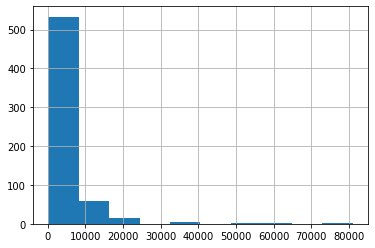

In [28]:
train_data['ApplicantIncome'].hist()
# We see that most of the applicants are in the range between 0-20000

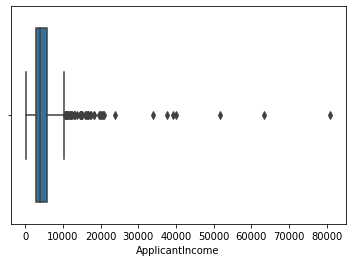

In [29]:
sns.boxplot(x=train_data['ApplicantIncome'])
# boxplot suggests that after 10000 most of them are outliers but for the sake of it, we'll take till a range of 25000

In [30]:
train_data.drop('Loan_ID',axis=1,inplace=True)

In [31]:
train_data=pd.get_dummies(train_data)

In [32]:
new_train_data=train_data.sample(frac=1).reset_index(drop=True)

In [33]:
new_train_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,0,4188,0.0,115.0,180.0,1.0,1,0,1,0,0,0,1,0
1,0,1,1,0,20833,6667.0,480.0,360.0,1.0,1,0,1,0,0,0,0,1
2,0,0,1,1,16250,0.0,192.0,360.0,0.0,0,0,1,0,0,0,0,1
3,0,1,1,0,11417,1126.0,225.0,360.0,1.0,1,0,0,0,1,0,0,1
4,0,0,1,0,3062,1987.0,111.0,180.0,0.0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,1,0,1820,1719.0,100.0,360.0,1.0,1,0,1,0,0,0,0,1
610,0,0,1,1,7167,0.0,128.0,360.0,1.0,1,0,1,0,0,0,0,1
611,1,1,1,1,19484,0.0,600.0,360.0,1.0,1,0,0,1,0,0,1,0
612,0,0,1,1,11000,0.0,83.0,360.0,1.0,0,0,1,0,0,0,0,1


In [34]:
x=new_train_data.drop('Loan_Status',axis=1)
y=new_train_data['Loan_Status']

In [35]:
from sklearn.model_selection import train_test_split as tts
tr_x,ts_x,tr_y,ts_y=tts(x,y,random_state=100,test_size=0.25,stratify=y)

In [36]:
tr_column=tr_x.columns

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
tr_x=scaler.fit_transform(tr_x)
tr_x=pd.DataFrame(tr_x,columns=tr_column)

In [38]:
ts_x=scaler.transform(ts_x)
ts_x=pd.DataFrame(ts_x,columns=tr_column)

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(tr_x,tr_y)

C:\Users\Ajay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
pred=lr.predict(tr_x)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
k=accuracy_score(pred,tr_y)
k

0.8195652173913044

In [43]:
test_data=pd.read_csv('test_lAUu6dG.csv')

In [44]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [45]:
test_data.drop('Loan_ID',axis=1,inplace=True)

In [46]:
nm=lr.predict(test_data)

ValueError: could not convert string to float: 'Male'